In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS



In [87]:


listOfCourses=['df_courses','df_rev','df_udemy','df_edx']

limpieza de datos de df coursera

In [265]:
# creacion de df de diferentes arcivos relacionados a coursera
df_courses= pd.read_csv(r'Coursera_courses.csv')
df_rev= pd.read_csv(r'Coursera_reviews.csv')

#añadi un dataframe complementario para tener cantidad de suscriopciones
df_coursera_complementario= pd.read_csv(r'coursea_data.csv')

#elimine columnas que no me parecen relevantes, reviwers y date reviwe
df_rev.drop(['reviewers','date_reviews'],axis=1, inplace=True)

# agrupe y promedie los reviws usando el course id como argumento 
rev = df_rev.groupby('course_id')['rating'].mean()

# realize un merge entre los dos df de coursera correspondientes a info de el curso y las revews 
df_coursera=pd.merge(df_courses, rev, on="course_id")

# elimine la columna course url
df_coursera.drop('course_url', axis=1 , inplace= True)

#realice un redondeo con un decimal para hacer reducir las categorias en mis ratings
df_coursera['rating']=df_coursera['rating'].round(decimals=1)

#renombre la columna que contiene el nombre para unir a mi dataset existente usando esta columna
df_coursera_complementario.rename(columns={'course_title':'name'},inplace= True)

#uni datasets 
dfcoursera=pd.merge(df_coursera_complementario, df_coursera, on="name")



dfcoursera['rating']=(dfcoursera['rating']+dfcoursera['course_rating'])/2

dfcoursera['rating'].round(decimals=1)

# elimine columnas no utiles o redundantes 

dfcoursera.drop(['course_organization','Unnamed: 0','course_rating'], axis=1 , inplace= True)

#dfcoursera.sort_values(by=['rating'], ascending= False,inplace=True)

#cambie un dato que estaba anotado en millones a miles 
dfcoursera.loc[dfcoursera["course_students_enrolled"] == '1.3m'] = "1300k"
#extraje los str en columna de course_students_enrolled 
dfcoursera['course_students_enrolled']=(dfcoursera['course_students_enrolled'].str.extract('(\d+)'))
#converti los valores a tipo int
dfcoursera['course_students_enrolled']=dfcoursera['course_students_enrolled'].astype(int)
#multiplique los valores de columna course_students_enrolled por para convertir a miles, esto estaba anotado con este formato(12.3k) la letra k refiriendo a miles 
dfcoursera['course_students_enrolled']=dfcoursera['course_students_enrolled']*1000

dfcoursera.to_csv(r'coursera.csv')



In [196]:
dfcoursera['course_students_enrolled'].value_counts()

120000    14
12000     11
110000    11
130000     9
22000      9
          ..
48000      1
350000     1
65000      1
90000      1
70000      1
Name: course_students_enrolled, Length: 128, dtype: int64

In [197]:
dfcoursera

,name,course_Certificate_type,course_difficulty,course_students_enrolled,institution,course_id,rating
115,El Abogado del Futuro: Legaltech y la Transfor...,COURSE,Beginner,1000,Universidad Austral,legaltech,5.0
45,Bugs 101: Insect-Human Interactions,COURSE,Beginner,15000,University of Alberta,bugs-101,4.95
113,Economics of Money and Banking,COURSE,Mixed,83000,Columbia University,money-banking,4.95
414,The Horse Course: Introduction to Basic Care a...,COURSE,Mixed,29000,University of Florida,horse-care,4.95
317,More Introduction to Financial Accounting,COURSE,Mixed,40000,University of Pennsylvania,wharton-financial-accounting,4.9
...,...,...,...,...,...,...,...
268,"Introduction to Trading, Machine Learning & GCP",COURSE,Intermediate,13000,New York Institute of Finance,introduction-trading-machine-learning-gcp,3.7
130,Epigenetic Control of Gene Expression,COURSE,Mixed,35000,The University of Melbourne,epigenetics,2.9
127,Entrepreneurship Strategy: From Ideation to Exit,COURSE,Beginner,20000,HEC Paris,entrepreneurship-strategy,2.9
381,Social and Economic Networks: Models and Anal...,COURSE,Advanced,42000,Stanford University,social-economic-networks,2.9


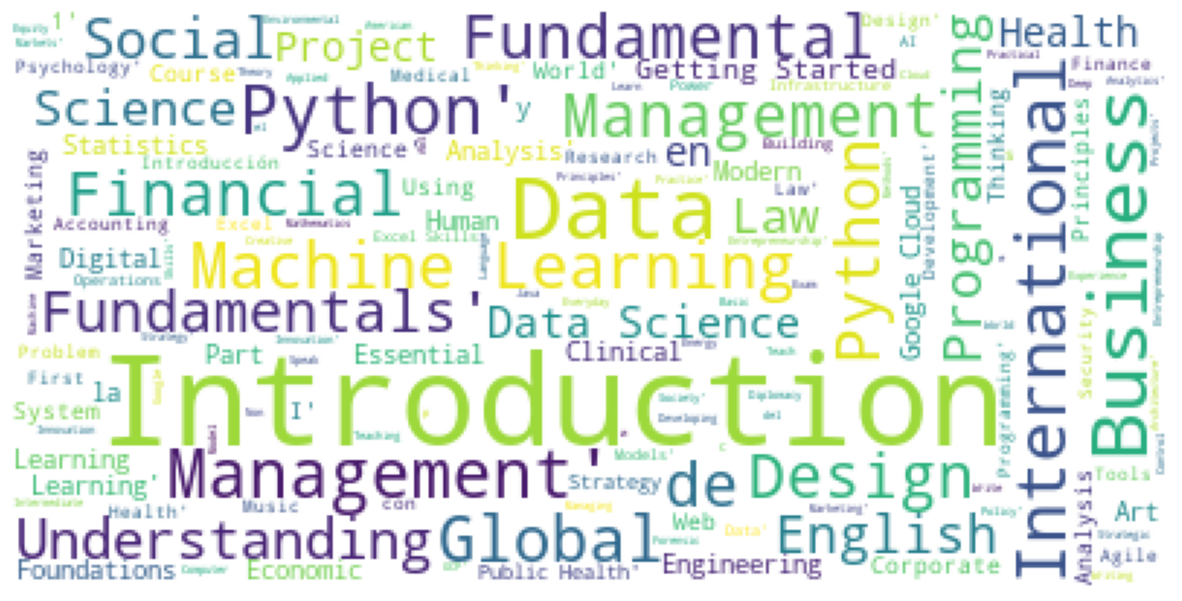

In [145]:
text = dfcoursera['name'].values 

wordcloud = WordCloud(background_color= 'white').generate(str(text))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

                        
limpieza de datos de df udemy

In [91]:

# creacion de df de diferentes arcivos relacionados a coursera
df_udemy= pd.read_csv(r'udemy_courses.csv')


# elimine todos los cursos gratis ya que son muy pocos y decidi no considerarlos en las ventas ya que todos son outliers por su naturaleza gratuita
df_udemy = df_udemy.drop(df_udemy[df_udemy['is_paid']== False].index)
df_udemy.drop_duplicates(subset=['course_id','url'],inplace=True)
df_udemy.drop(['is_paid','url','published_timestamp','num_reviews','num_lectures'], axis=1 , inplace=True)


In [92]:
df_udemy

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1070968,Ultimate Investment Banking Course,200,2147,23,51,All Levels,1.5,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,75,2792,923,274,All Levels,39.0,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,95,2451,11,36,All Levels,3.0,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,200,1276,45,26,Intermediate Level,2.0,Business Finance
...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,100,1040,14,21,All Levels,2.0,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,25,306,3,42,Beginner Level,3.5,Web Development
3675,635248,Learn and Build using Polymer,40,513,169,48,All Levels,3.5,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,50,300,31,38,All Levels,3.0,Web Development


In [201]:
df_udemy['level'].value_counts()

All Levels            1803
Beginner Level        1110
Intermediate Level     391
Expert Level            58
Name: level, dtype: int64

In [204]:
df_udemy['content_duration'].value_counts()


1.000000     529
1.500000     458
2.000000     373
2.500000     253
3.000000     228
            ... 
78.500000      1
0.483333       1
34.000000      1
31.000000      1
66.500000      1
Name: content_duration, Length: 105, dtype: int64

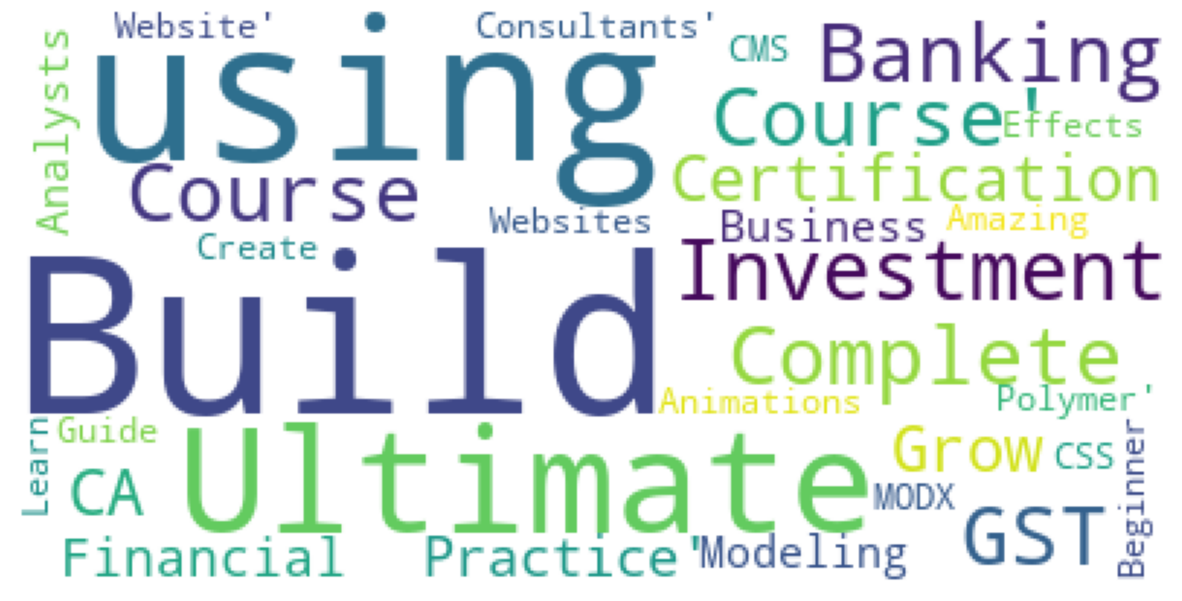

In [146]:
text = df_udemy['course_title'].values 

wordcloud = WordCloud(background_color= 'white').generate(str(text))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [29]:
# df_rev['course_id'].value_counts()
#df_rev.loc[df_rev['inst']=='A','hID'].agg(['nunique','count','size'])

limpieza de datos de df edx

In [181]:
df_edx= pd.read_csv(r'edx_courses.csv')
df_edx['price']=(df_edx['price'].str.extract('(\d+)'))
df_edx['price']=df_edx['price'].astype(int)

In [205]:
df_edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [207]:
df_edx['Level'].value_counts()


Introductory    621
Intermediate    267
Advanced         87
Name: Level, dtype: int64

In [208]:
df_edx['course_type'].value_counts()

Self-paced on your time                917
Instructor-led on a course schedule     58
Name: course_type, dtype: int64

In [210]:
df_edx['language'].value_counts()

English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

In [211]:
df_edx['subtitles'].value_counts()

English                                                                            713
Español                                                                            157
English, 中文                                                                         21
English, Español                                                                    21
English, हिन्दी                                                                     10
Français                                                                             7
English, Русский                                                                     5
Italiano                                                                             4
Português                                                                            4
English, 中文, 中文                                                                      3
English, 日本語                                                                         3
English, Français                          

In [213]:
df_edx['subject'].value_counts()

Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Food & Nutrition                  6
Philosophy & Ethics               6
Chemistry                         5
Architecture                

In [215]:
print(df_edx['course_effort'].value_counts())

2–4 hours per week      108
2–3 hours per week      104
3–5 hours per week      103
3–4 hours per week       91
4–6 hours per week       79
8–10 hours per week      57
1–2 hours per week       55
4–5 hours per week       55
6–8 hours per week       51
5–7 hours per week       28
5–10 hours per week      23
3–6 hours per week       23
1–3 hours per week       22
2–5 hours per week       19
5–8 hours per week       19
5–6 hours per week       15
8–12 hours per week      13
9–10 hours per week      12
1–5 hours per week       10
4–8 hours per week        8
10–12 hours per week      8
4–10 hours per week       7
7–10 hours per week       7
10–20 hours per week      6
2–6 hours per week        5
6–10 hours per week       5
3–7 hours per week        4
10–11 hours per week      3
10–15 hours per week      3
10–14 hours per week      3
6–9 hours per week        2
4–7 hours per week        2
1–10 hours per week       2
11–13 hours per week      2
10–18 hours per week      2
6–12 hours per week 

In [ ]:
print(df_udemy['course_title'].nunique())

3663


In [ ]:
listOfCourses

['df_courses', 'df_rev', 'df_udemy', 'df_edx']

In [ ]:
print(df_udemy['subject'].value_counts())
print(df_edx['subject'].value_counts())
print(df_courses['subject'].value_counts())
print(df_rev['subject'].value_counts())


Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64
Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                           

KeyError: 'subject'

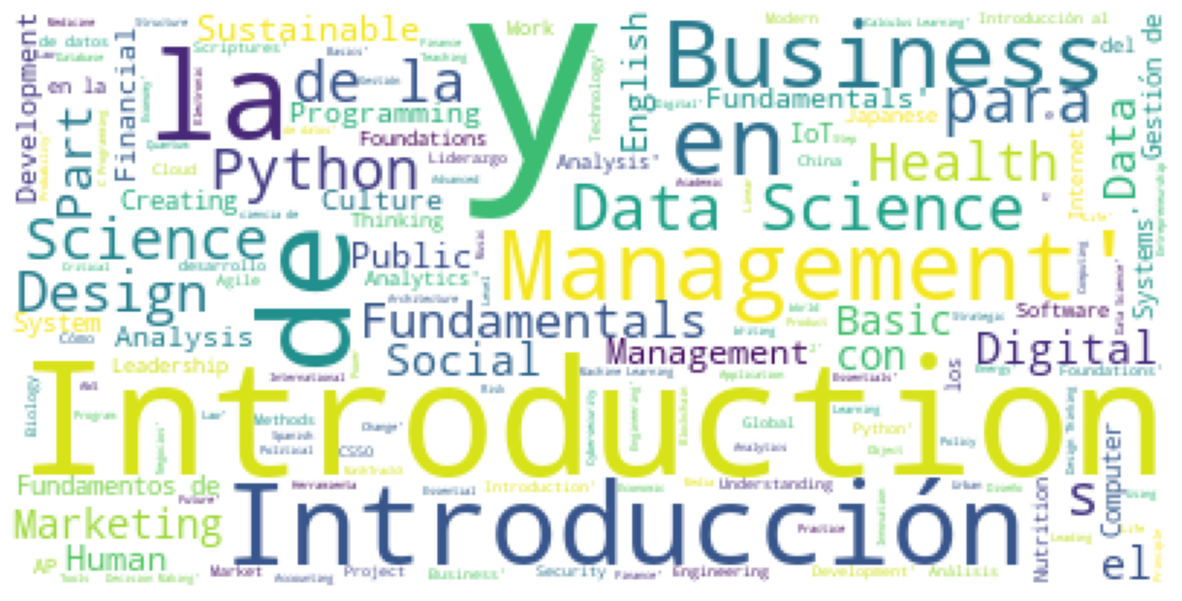

In [147]:
text = df_edx['title'].values 

wordcloud = WordCloud(background_color= 'white').generate(str(text))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [217]:
df_edx.to_csv(r'edx.csv')

In [218]:
df_udemy.to_csv(r'udemy.csv')
